# Q-learning and Sarsa, Example 6.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from cliff_walking import CliffWalkingEnv

In [2]:
env = CliffWalkingEnv()
step_size = 0.5
epsilon = 0.1
gamma = 1.0

In [3]:
def run_q_learning(env, episode_num=500):
    state_num = env.observation_space.n
    action_num = env.action_space.n
    q_values = np.zeros((state_num, action_num))

    episode_rewards = []
    for _ in range(episode_num):
        obs = env.reset()
        total_reward = []
        while True:
            if np.random.random() < epsilon:
                act = np.random.randint(0, action_num)
            else:
                act = np.argmax(q_values[obs])
            next_obs, reward, done, _ = env.step(act)
            total_reward.append(reward)
            q_values[obs][act] = q_values[obs][act] + step_size * (reward + gamma * np.max(q_values[next_obs]) - q_values[obs][act])
            if done:
                break
            else:
                obs = next_obs
        episode_rewards.append(np.sum(total_reward))
    return episode_rewards, q_values

def run_sarsa(env, episode_num=500):
    state_num = env.observation_space.n
    action_num = env.action_space.n
    q_values = np.zeros((state_num, action_num))

    episode_rewards = []
    for _ in range(episode_num):
        total_reward = 0
        obs = env.reset()

        if np.random.random() < epsilon:
            act = np.random.randint(0, action_num)
        else:
            act = np.argmax(q_values[obs])
        while True:
            next_obs, reward, done, _ = env.step(act)
            if np.random.random() < epsilon:
                next_act = np.random.randint(0, action_num)
            else:
                next_act = np.argmax(q_values[next_obs])
            total_reward += reward
            q_values[obs][act] = q_values[obs][act] + step_size * (reward + gamma * q_values[next_obs][next_act] - q_values[obs][act])
            if done:
                break
            else:
                obs = next_obs
                act = next_act
        episode_rewards.append(total_reward)
    return episode_rewards, q_values

In [4]:
run_num = 100
q_learning_rewards = []
q_learning_values = []
sarsa_rewards = []
sarsa_values = []
for _ in tqdm(range(run_num)):
    rewards, values = run_q_learning(env)
    q_learning_rewards.append(rewards)
    q_learning_values.append(values)
    rewards, values = run_sarsa(env)
    sarsa_rewards.append(rewards)
    sarsa_values.append(values)

100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


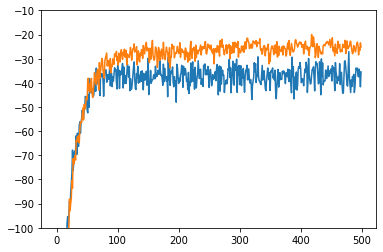

In [5]:
plt.ylim(-100, -10)
plt.plot(np.mean(np.array(q_learning_rewards), axis=0))
plt.plot(np.mean(np.array(sarsa_rewards), axis=0))

For off-policy method Q-learning, the online performance is worse than Sarsa, it is because of that Q-learning is learning from an optimal policy that is near to the cliff, with epsilong probability of falling the cliff and get a bad reward. While sarsa is learning from a suboptimal policy that can move along a safer path. Trajectories for either polices are demonstrated below:

In [6]:
q_learning_value = np.mean(q_learning_values, axis=0)
obs = env.reset()
while True:
    env.render()
    act = np.argmax(q_learning_value[obs])
    next_obs, rewards, done, _ = env.step(act)
    if done:
        break
    else:
        obs = next_obs

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

In [7]:
sarsa_value = np.mean(sarsa_values, axis=0)
obs = env.reset()
while True:
    env.render()
    act = np.argmax(sarsa_value[obs])
    next_obs, rewards, done, _ = env.step(act)
    if done:
        break
    else:
        obs = next_obs

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  x  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  x